In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'

train = pd.read_csv('C:\\Users\\endnj\\Downloads\\titanic\\train.csv')
test = pd.read_csv('C:\\Users\\endnj\\Downloads\\titanic\\test.csv')

In [2]:
dic = {"male": 0, "female": 1}
train.loc[:, 'Sex'] = train.loc[:, 'Sex'].map(dic)

In [3]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Fare'] = train['Fare'].fillna(33)

In [4]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')

In [5]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')

In [6]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

In [7]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [8]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46
train.Age.isnull().any()
train.Age.isnull().sum()

0

In [9]:
train['AgeCut'] = pd.qcut(train['Age'], 4, labels=[0,1,2,3])
train.drop('Age', axis=1, inplace=True)

In [10]:
train['FareCut'] = pd.qcut(train['Fare'], 4, labels=[0,1,2,3])
train.drop('Fare', axis=1, inplace=True)

In [11]:
dic = {"S": 0, "C": 1, "Q": 2}
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].map(dic)
test.loc[:, 'Embarked'] = test.loc[:, 'Embarked'].map(dic)

In [12]:
train.drop(['Name','Ticket','Cabin','Initial','PassengerId'],axis=1,inplace=True)

In [13]:
dic = {"male": 0, "female": 1}
test.loc[:, 'Sex'] = test.loc[:, 'Sex'].map(dic)
test['Embarked'] = test['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(33)

In [14]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')

In [15]:
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)


In [16]:
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=46
test.Age.isnull().any()
test.Age.isnull().sum()


0

In [17]:
test['AgeCut'] = pd.qcut(test['Age'], 4, labels=[0,1,2,3])
test.drop('Age', axis=1, inplace=True)


In [18]:
test['FareCut'] = pd.qcut(test['Fare'], 4, labels=[0,1,2,3])
test.drop('Fare', axis=1, inplace=True)


In [19]:
test.drop(['Name','Ticket','Cabin','Initial','PassengerId'],axis=1,inplace=True)

In [20]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCut,FareCut
0,0,3,0,1,0,0,0,0
1,1,1,1,1,0,1,3,3
2,1,3,1,0,0,0,1,1
3,1,1,1,1,0,0,2,3
4,0,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,1
887,1,1,1,0,0,0,0,2
888,0,3,1,1,2,0,0,2
889,1,1,0,0,0,1,1,2


In [21]:
test

,Pclass,Sex,SibSp,Parch,Embarked,AgeCut,FareCut
0,3,0,0,0,2,2,0
1,3,1,1,0,0,3,0
2,2,0,0,0,2,3,1
3,3,0,0,0,0,1,1
4,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...
413,3,0,0,0,0,2,1
414,1,1,0,0,1,3,3
415,3,0,0,0,0,3,0
416,3,0,0,0,0,2,1


In [22]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [23]:
train,test=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train[train.columns[1:]]
Y=train['Survived']

In [24]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy of rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy of rbf SVM is  0.8208955223880597


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy of Linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy of Linear SVM is  0.7910447761194029


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy of the LogisticRegression is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy of the LogisticRegression is  0.8022388059701493


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Accuracy of the Decision Tree is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy of the Decision Tree is  0.7910447761194029


In [28]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Accuracy of the KNN is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy of the KNN is  0.7910447761194029


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

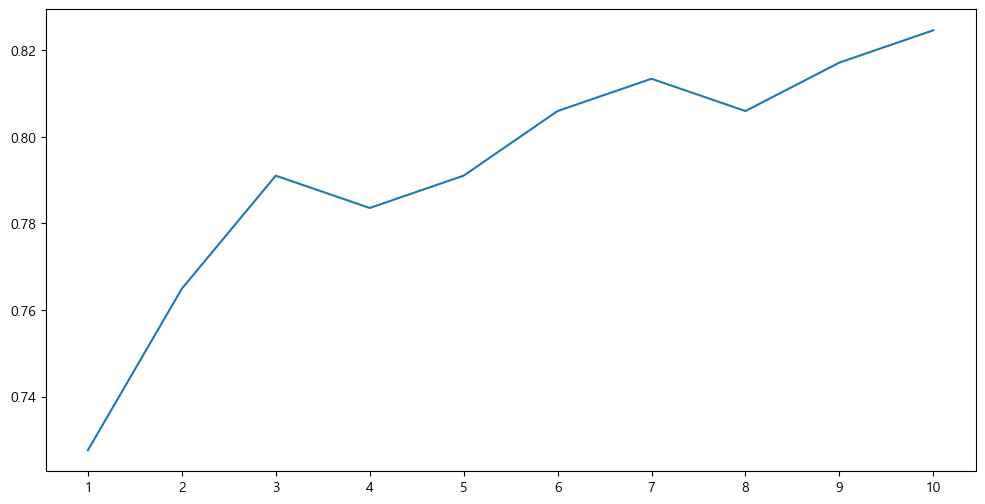

Accuracy of different values of n are: [0.72761194 0.76492537 0.79104478 0.78358209 0.79104478 0.80597015
 0.81343284 0.80597015 0.81716418 0.82462687] with the max value as 0.8246268656716418


In [29]:
a_index = list(range(1, 11))
a = []  # 빈 리스트로 초기화

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction, test_Y)
    a.append(accuracy)  # 정확도를 리스트에 추가

# 리스트를 Pandas Series로 변환
a = pd.Series(a, index=a_index)

plt.plot(a_index, a)
plt.xticks(a_index)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracy of different values of n are:', a.values, 'with the max value as', a.values.max())


In [30]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('Accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy of the NaiveBayes is  0.7798507462686567


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('Accuracy of the Random Forest is ',metrics.accuracy_score(prediction7,test_Y))

Accuracy of the Random Forest is  0.8097014925373134


C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,shuffle=True, random_state=22)
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=10)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784793,0.038531
Radial Svm,0.802535,0.034622
Logistic Regression,0.788070,0.033805
KNN,0.783333,0.052924
Decision Tree,0.772069,0.041808
Naive Bayes,0.759217,0.029544
Random Forest,0.786662,0.041724


<Axes: >

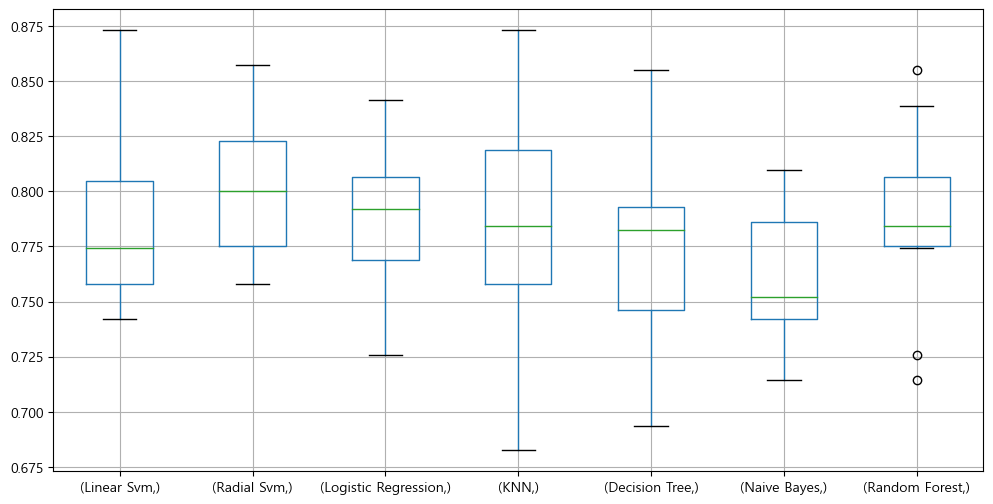

In [33]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

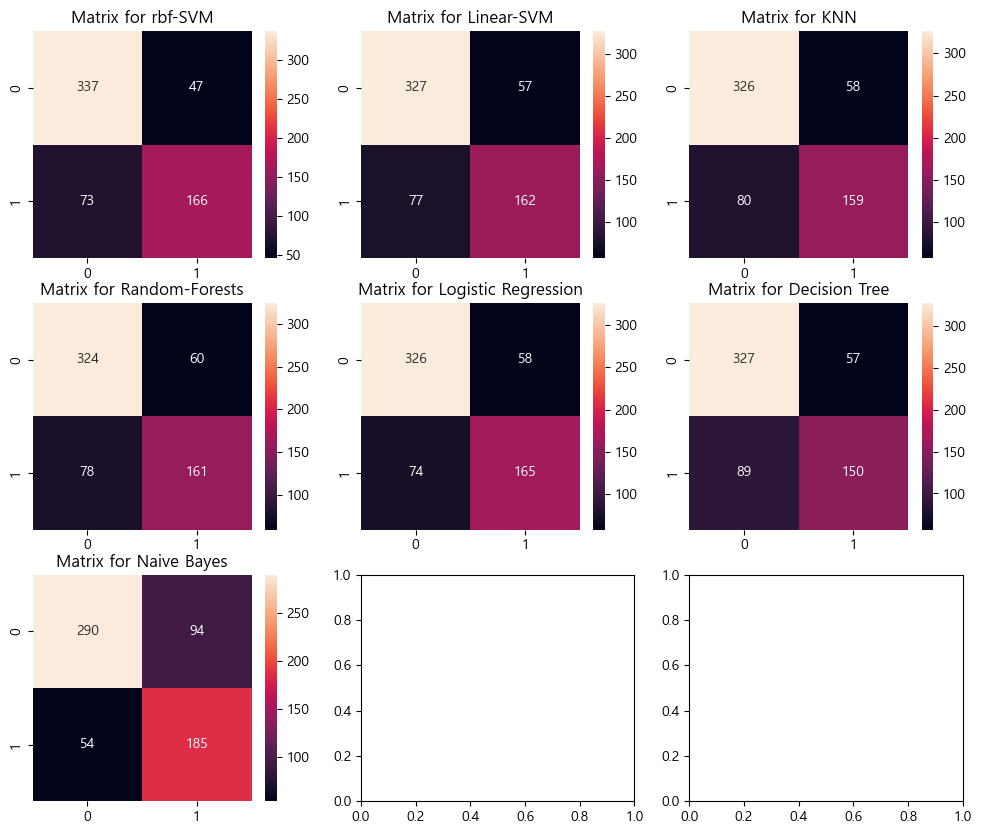

In [34]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred=cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred=cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8137677419354838
SVC(C=0.5, gamma=0.2)


In [36]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.781625806451613
RandomForestClassifier(n_estimators=800, random_state=0)


In [37]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10),random_state=0,n_estimators=600)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is : ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is: ',result.mean())

C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for bagged KNN is :  0.8283582089552238
The cross validated score for bagged KNN is:  0.7945468509984639


In [38]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is : ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is : ',result.mean())

C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for bagged Decision Tree is :  0.8059701492537313
The cross validated score for bagged Decision Tree is :  0.7752432155657962


In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=800,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7785714285714286


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is : ',result.mean())

The cross validated score for Gradient Boosting is :  0.7880184331797235


In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [138]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8098360655737704
GradientBoostingClassifier(learning_rate=0.05)


In [125]:
train_Xxgb = train_X.iloc[:train_X.shape[0]].values
test_Xxgb = train_X.iloc[train_X.shape[0]:].values
train_Yxgb = train_Y['Survived'].values

In [126]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
result = cross_val_score(gbm, train_Xxgb, train_Yxgb, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.806774193548387


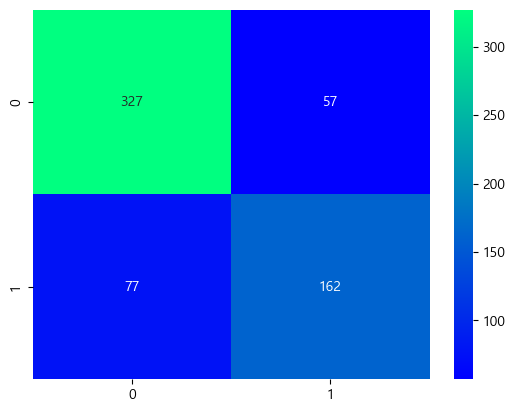

In [50]:
ada=GradientBoostingClassifier(learning_rate=0.05, n_estimators=400)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

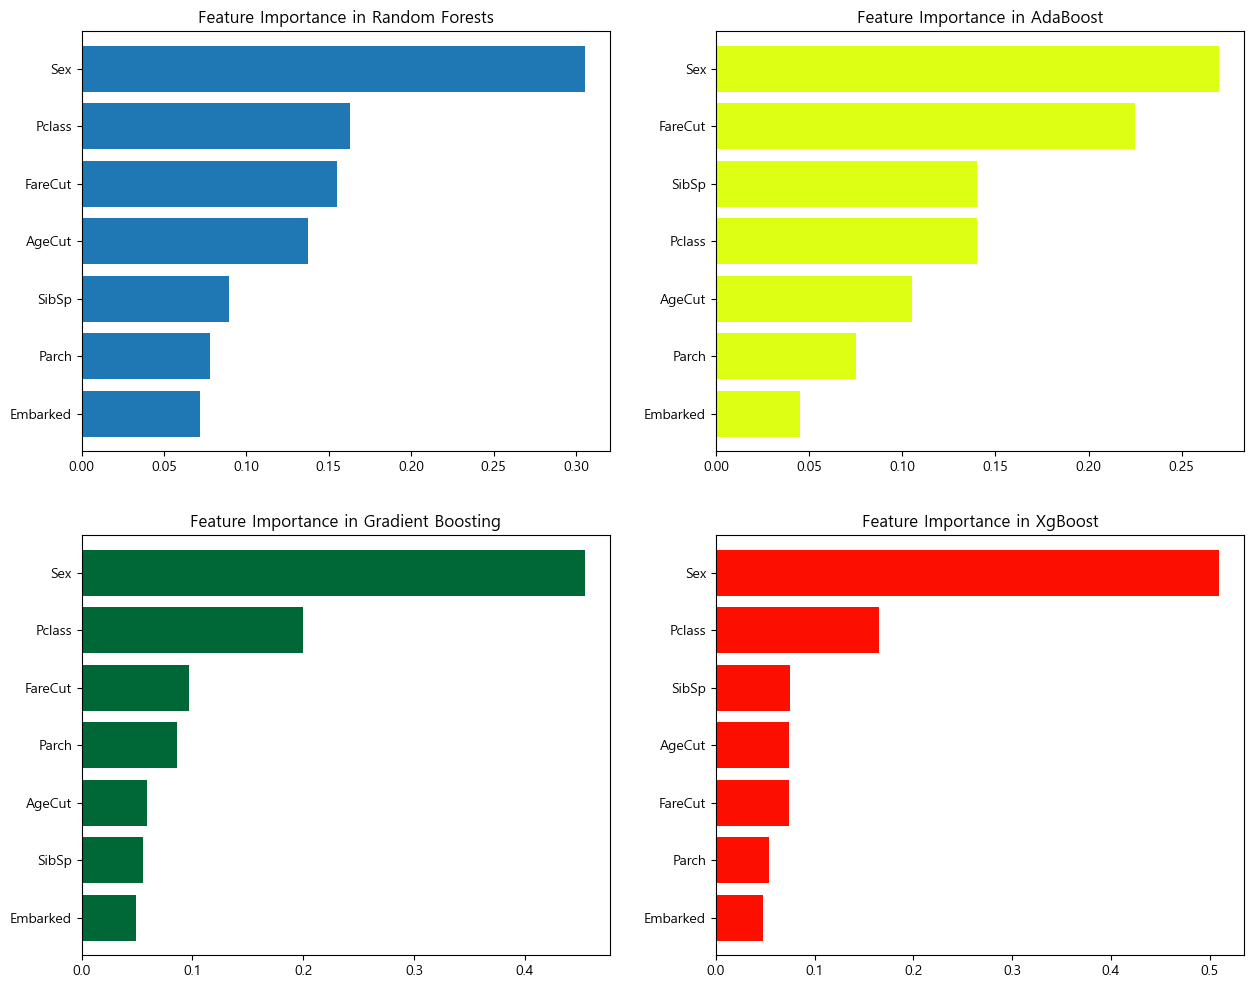

In [127]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=700,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(train_Xxgb,train_Yxgb)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()